<a href="https://colab.research.google.com/github/priyeshr7/Machine-Learning/blob/main/Logistic_regression__on__breast_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

print(os.listdir())

['.config', '.ipynb_checkpoints', 'Breast Cancer data.csv', 'sample_data']


In [19]:
data = pd.read_csv('/content/Breast Cancer data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
data.drop(['Unnamed: 32','id'], axis=1, inplace=True)

In [73]:
data.diagnosis=[1 if each == 'M' else 0 for each in data.diagnosis]
y= data.diagnosis.values
x_data= data.drop(['diagnosis'], axis=1)

In [70]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [74]:
x= (x_data - x_data.min())/ (x_data.max() - x_data.min()).values

In [75]:
from sklearn.model_selection import train_test_split
# Assuming 'a_data' contains features and 'a' contains target variable
x_train, x_test, y_train,y_test =train_test_split(x, y ,test_size=0.15,random_state=42)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print("x train :", x_train.shape)
print("y train :", y_train.shape)
print("x test :", x_test.shape)
print("y test :", y_test.shape)

x train : (30, 483)
y train : (483,)
x test : (30, 86)
y test : (86,)


In [76]:
#initializing the weights (w) and bias (b)
def initialise_weight_and_bias(dimension):
  w=np.full((dimension,1),0.01) #create an array of dimention 1 with value 0.01
  b=0.0 #bias is a single number,& used to shift the activation function
  return w,b

In [77]:
def sigmoid(z):
  y_head=1/(1+np.exp(-z))
  return y_head

In [82]:
def forward_backward_propogation(w,b,x_train,y_train):
  #forward propogation
  z=np.dot(w.T,x_train) + b
  y_head=sigmoid(z)

  loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
  cost = (np.sum(loss))/x_train.shape[1]
  # backward propagation
  derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
  derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
  # x_train.shape[1]  is for scaling
  gradients={"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
  return cost,gradients

In [83]:
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
  cost_list=[]
  cost_list2=[]
  index=[]

  for i in range(number_of_iteration):
    cost,gradients=forward_backward_propogation(w,b,x_train,y_train)
    cost_list.append(cost)
    w=w-learning_rate*gradients["derivative_weight"]
    b= b- learning_rate*gradients["derivative_bias"]
    if i%10==0:
      cost_list2.append(cost)
      index.append(i)
      print("cost after %i iteration is %f" %(i,cost))

  parameters ={"weight":w ,"bias":b}
  plt.plot(index,cost_list2)
  plt.xticks(index,rotation='vertical')
  plt.xlabel("Number of Iterarion")
  plt.ylabel("Cost")
  plt.show()
  return parameters, gradients, cost_list


In [84]:
def predict(w,b,x_train):
  z=sigmoid(np.dot(w.T,x_train)+b)
  y_prediction = np.zeros((1,x_train.shape[1]))
  for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1

  return y_prediction

cost after 0 iteration is 0.729671
cost after 10 iteration is 0.037836
cost after 20 iteration is 0.020488
cost after 30 iteration is 0.014155
cost after 40 iteration is 0.010849
cost after 50 iteration is 0.008811
cost after 60 iteration is 0.007427
cost after 70 iteration is 0.006423
cost after 80 iteration is 0.005662
cost after 90 iteration is 0.005065


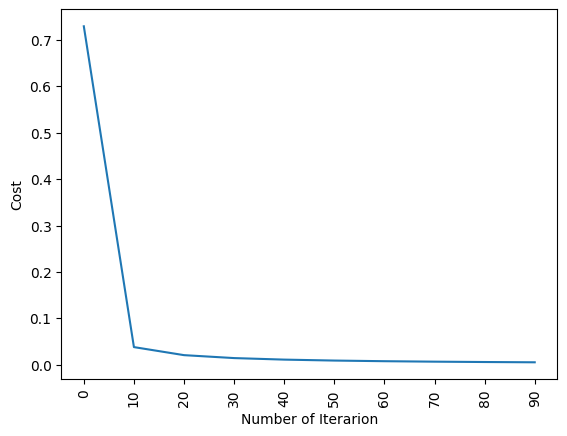

train accuracy: 100.0 %
test accuracy: 100.0 %


In [85]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    dimension =  x_train.shape[0]
    w,b = initialise_weight_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)


    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100)